# Iris Flower Classification with Random Forest & Confusion Matrix

##  Project Overview:

In this project, I use the well-known Iris dataset to build a classification model that can accurately identify flower species based on petal and sepal measurements. I train a Random Forest Classifier, evaluate it using a Confusion Matrix, and interpret the results. This project demonstrates core machine learning steps: data preprocessing, model training, and performance evaluation using Scikit-learn in Python.


## Loading the libraries

In [16]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


## Data Loading and Preparation

In [13]:
iris = load_iris()
# Converting to a DataFrame for readability:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitting into Train and Test Sets

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

# 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Training the Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

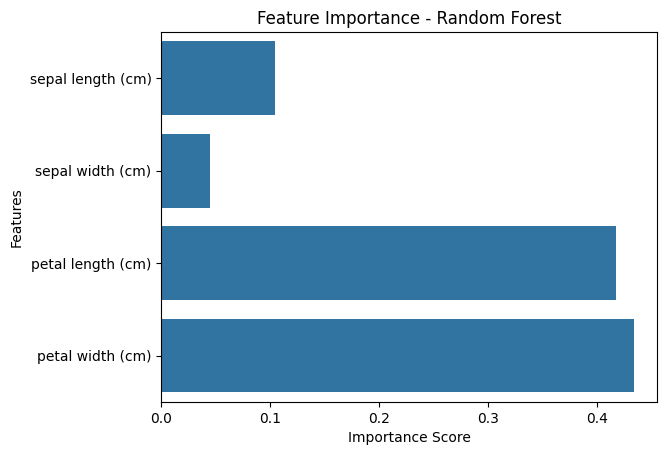

In [22]:
import seaborn as sns

feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


## **Predict & Evaluate**

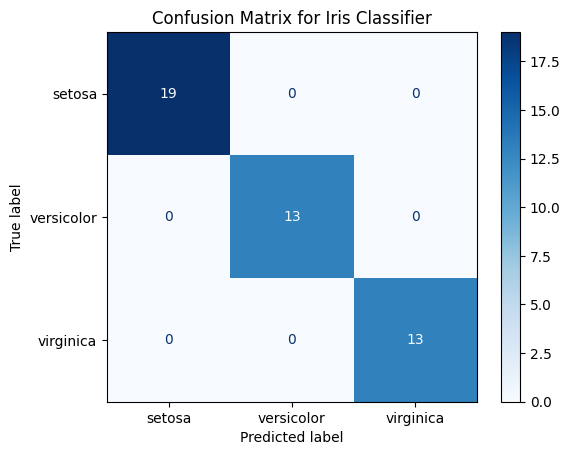

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predict
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Iris Classifier")
plt.show()


## **Printing the Matrix value and accuracy**

In [17]:
print("Confusion Matrix:\n", cm)
print("Accuracy:", clf.score(X_test, y_test))


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 1.0


## **Clasiffication Report**

In [18]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## **Conclusion:**

The Random Forest Classifier performed exceptionally well on the Iris dataset, achieving 100% accuracy on the test set. The confusion matrix shows perfect predictions across all three classes: Setosa, Versicolor, and Virginica. The classification report confirms high precision, recall, and F1-scores. This demonstrates that the model can reliably distinguish between the flower species using just four features. This project illustrates a complete machine learning workflow and serves as a solid foundation for future model comparison and tuning.
